KNN - EN YAKIN KOMŞU
 Distance Based Algoritma Çeşidi :
 * Yani mesafeye dayalı hesaplama yapan algoritma
 * Aradaki mesafe belirleyici noktadır
 * Yeni noktanın diğer noklara olan mesafesini hesaplar. En yakın hangi sınıf ise ona dahil eder
 * Mesafeye dayalı hesaplamalarda scaled yapmak farzdır
 * KNN hesaplama yöntemleri:
 1- Öklit (en çok kullanılan)
 2- Manhattan
 * Çok kullanılmaz. En iyi scoru KNN ile aldım dersek soru işsareti ile yaklaşırlar
 * Çok güvenilir bir algoritma değildir.
 * En yakın kaç komşuya göre hesaplasın? sorusunun cevabı olan "k" yı biz belirliyoruz
 (3-5 gibi)
Dezavantajları:
 * Feature sayısı 2-3 ü geçtiği zaman mesafeyi ölçmek zorlaşıyor ve çok zaman alıyor
 * Veri setindeki gözlem (satır)sayısı büyük olduğunda her birine olan mesafeyi ölçmek çok maliyetli
Çalışma Mantığı:
 * Mesafe hesaplamalarını yapar
 * Küçükten büyüğe sort eder
 * k değerinden keser
 * Bölünen yerin üstünde kalan sınıflardan en çok hangisi varsa ona dahil eder.

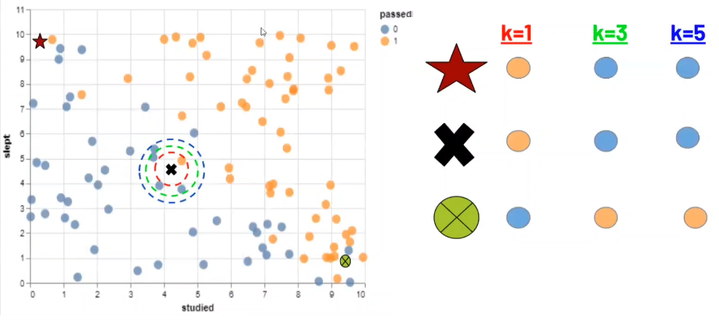

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def create_data():
    """
    Veriyi oluşturan fonksiyon.
    features: değişkenler, x ve y
    labels: sınıflar (A, B)
    """
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features, labels

In [19]:
features, labels = create_data()

In [22]:
print('features\n:', features)

features
: [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]


In [23]:
x_df = pd.DataFrame(features)
x_df

,0,1
0,2.88,3.05
1,3.10,2.45
2,3.05,2.80
3,2.90,2.70
4,2.75,3.40
5,3.23,2.90
6,3.20,3.75
7,3.50,2.90
8,3.65,3.60
9,3.35,3.30


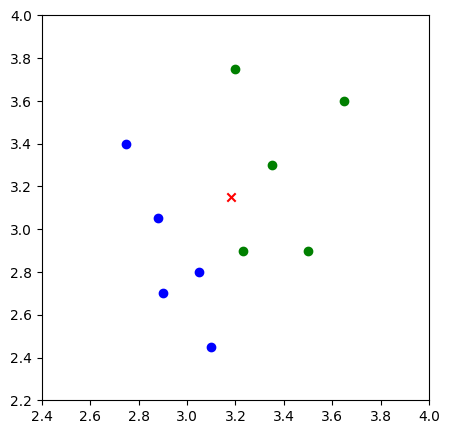

In [26]:
plt.figure(figsize=(5,5))
plt.xlim(2.4,4)
plt.ylim(2.2,4)

plt.scatter(x_df.iloc[:5,0], x_df.iloc[:5,1], c='b')
plt.scatter(x_df.iloc[5:,0], x_df.iloc[5:,1], c='g')


plt.scatter([3.18], [3.15], c='r', marker='x');


In [27]:
def manhattan(x, y):
    """ Manhattan Distance """
    d = np.sum(np.abs(x - y))
    return d

In [29]:
x = np.array([3, 5])
print("x:", x)
y = np.array([6, 9])
print("y:", y)
d_man = manhattan(x, y)
print(d_man)

x: [3 5]
y: [6 9]
7


$$d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$

In [30]:
def euclidean(x, y):
    """ Euclidean distanc """
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [31]:
x = np.array([3, 5])
print("x:", x)
y = np.array([6, 9])
print("y:", y)
d_euc = euclidean(x, y)
print(d_euc)

x: [3 5]
y: [6 9]
5.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Cancer Prediction Model

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [5]:
df['Cancer Present'].value_counts(normalize=True)

Cancer Present
1    0.5
0    0.5
Name: proportion, dtype: float64

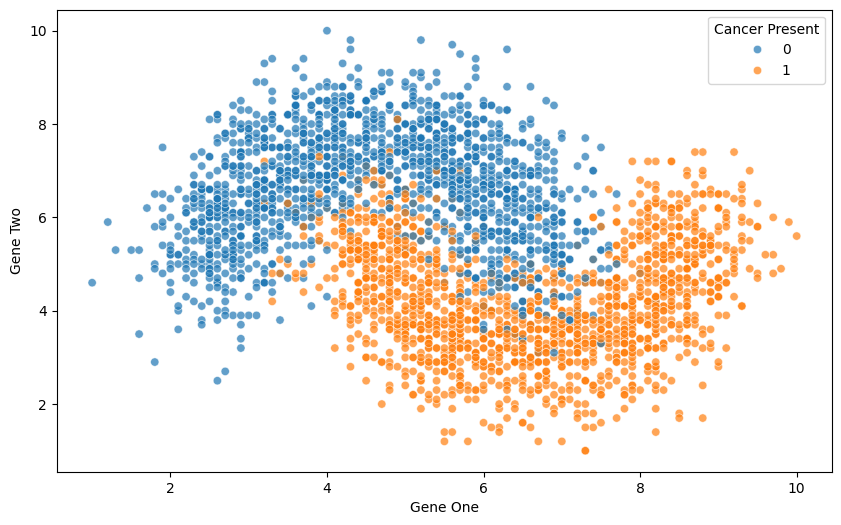

In [6]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha = 0.7);

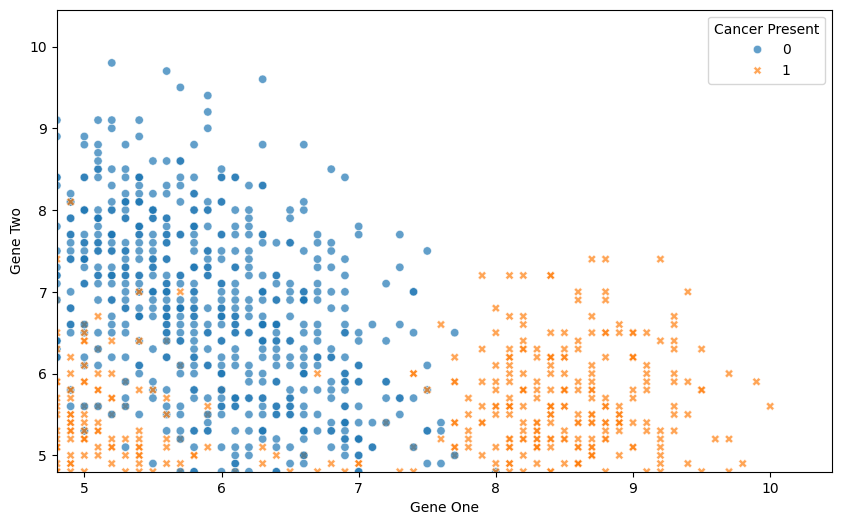

In [7]:
sns.scatterplot(x='Gene One', y='Gene Two', 
                hue='Cancer Present', 
                data=df, alpha = 0.7,
                style='Cancer Present')
plt.xlim(4.8)
plt.ylim(4.8)
plt.show()

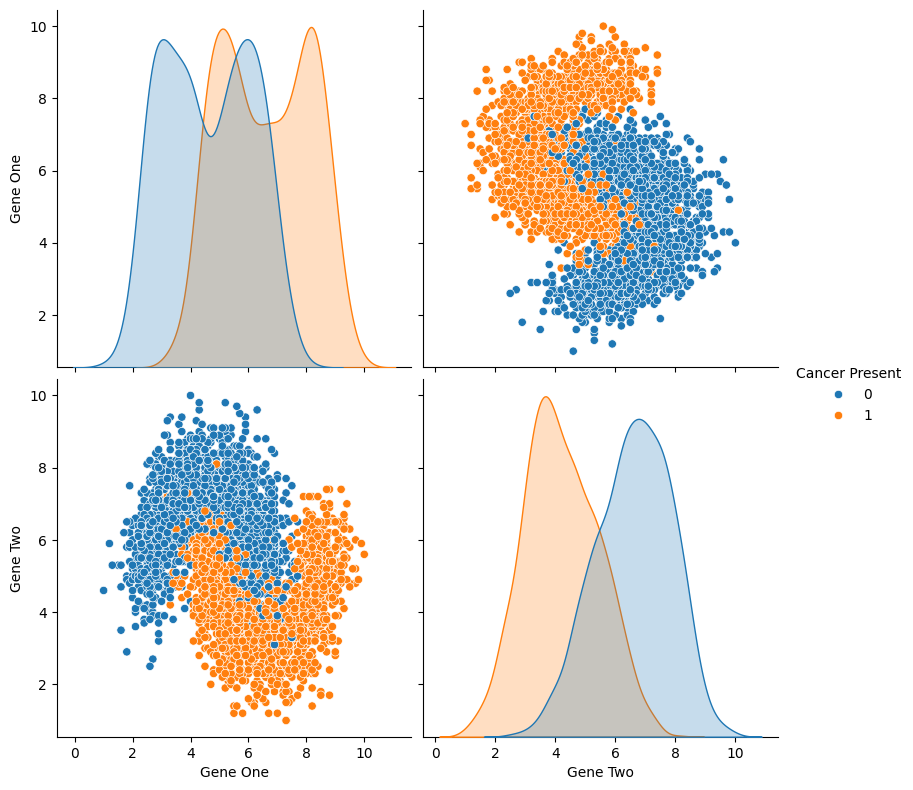

In [8]:
sns.pairplot(data=df, hue='Cancer Present', height= 4, aspect=1);

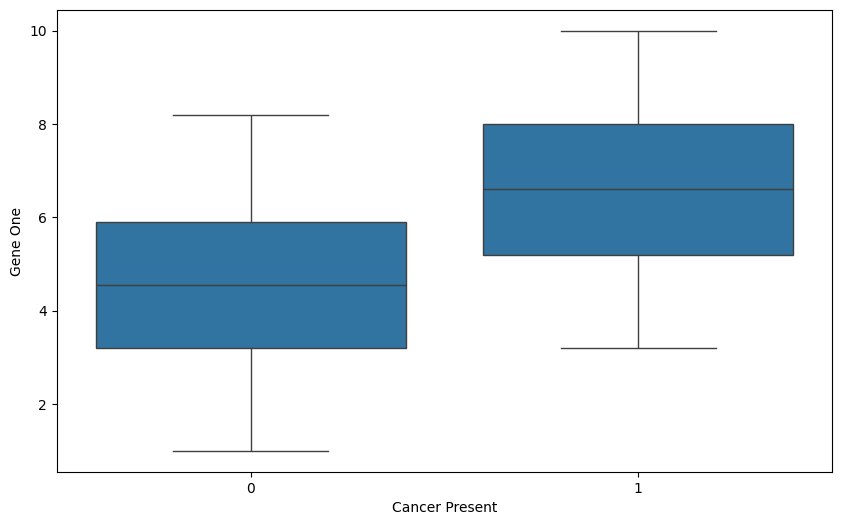

In [9]:
sns.boxplot(data=df, x='Cancer Present', y='Gene One');

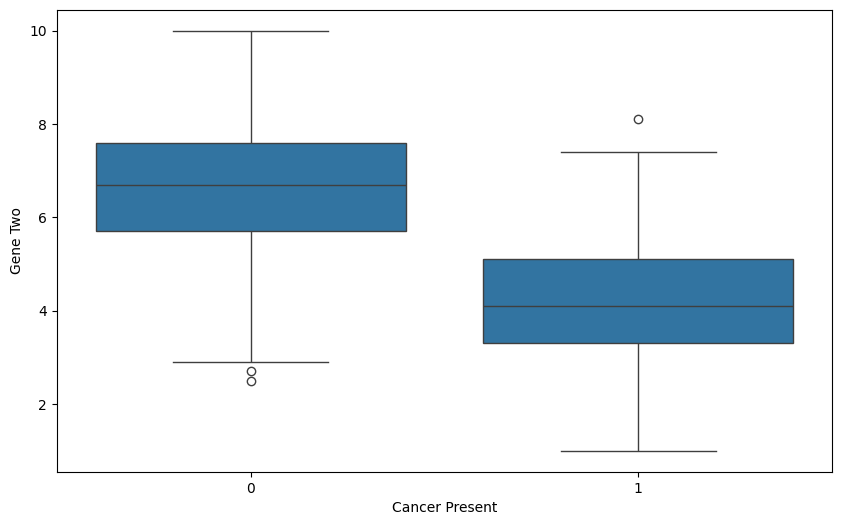

In [10]:
sns.boxplot(data=df, x='Cancer Present', y='Gene Two');

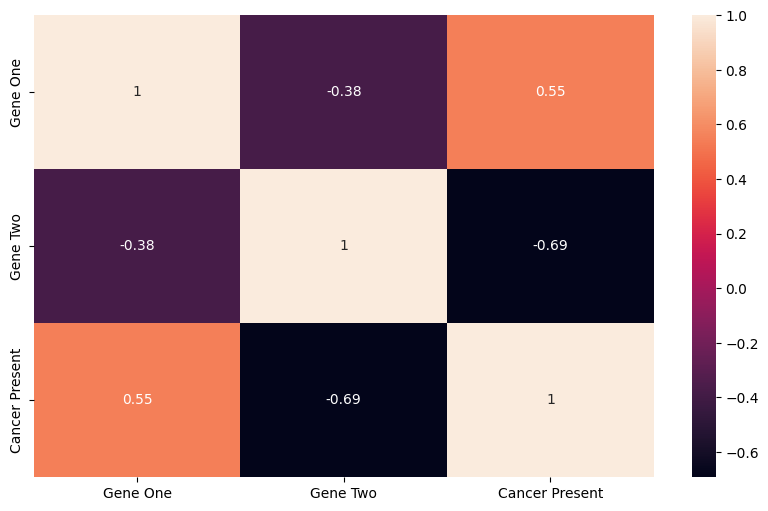

In [11]:
sns.heatmap(df.corr(), annot=True);

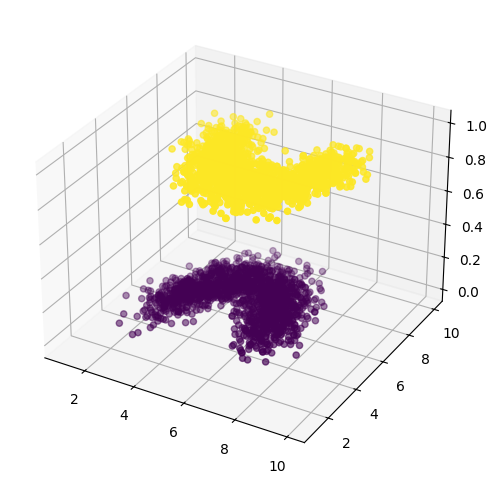

In [12]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

Train | Test Split and Scaling Data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
X = df.drop('Cancer Present', axis=1)
y= df['Cancer Present']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scaling Data

Veri kümesine ve probleme özgü olarak, deneyerek en uygun scale yöntemini belirlemek faydalı olacaktır.
Verilerin Ölçeği: Featurelerin değer aralıkları önemlidir. Özellikler arasında büyük değer farklılıkları varsa, Min-Max Ölçeklendirme kullanmak uygun olabilir. Ancak, değerler arasında büyük bir ölçek farkı yoksa, Z-Skor Ölçeklendirme (Standartlaştırma) daha uygun olabilir.
Örnek:
Özellik 1: 0 ile 100 arasında değerler alır.
Özellik 2: -1 ile 1 arasında değerler alır.
Bu durumda, Z-Skor Ölçeklendirme daha uygun olabilir, çünkü Min-Max Ölçeklendirme, özellik 1'in ölçeğini daraltarak veri kaybına neden olabilir.
Dağılım ve Aykırı Değerler: Eğer veriler normal bir dağılıma sahipse ve aykırı değerler azsa, Z-Skor Ölçeklendirme (StandardScaler) uygun olabilir. Ancak, verilerin dağılımı dengesiz veya aykırı değerler çok fazlaysa, Min-Max (MinmaxScaler) Ölçeklendirme bu duruma daha iyi uyabilir.
Kategorik Veriler: Eğer verilerde kategorik özellikler varsa ve sıralama aralığı yoksa, Min-Max (MinmaxScaler) Ölçeklendirme kullanmak anlamlı olmayabilir.
Model Bağımlılığı: Kullanılacak modelin ölçeklendirmeye duyarlılığı da dikkate alınmalıdır. Örneğin, **KNN gibi bir model**, uzaklık hesaplamalarına dayandığından, özelliklerin ölçeklendirilmesi bu modele önemli ölçüde etki eder.
Hiperparametre Ayarlaması: Bazı makine öğrenme algoritmaları, özelliklerin ölçeklendirilmesine bağlı olarak farklı hiperparametre değerlerine ihtiyaç duyabilir. Bu durumda, farklı ölçeklendirme yöntemlerini deneyerek en iyi sonuçları elde etmek mümkün olabilir.
Sonuç olarak, hangi ölçeklendirme yönteminin kullanılacağı veri kümesinin **doğasına, özelliklerin dağılımına, kullanılacak modelin özelliklerine ve hiperparametre ayarlamalarına** bağlıdır.

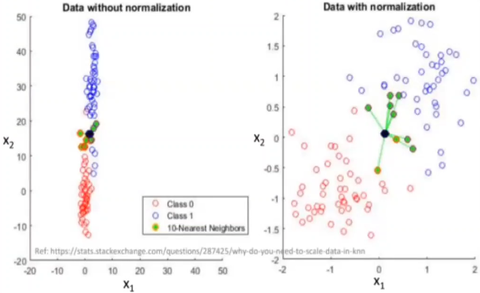

In [77]:
scaler = StandardScaler()

In [78]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

Modeling

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [81]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [82]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [83]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.8,0.2
...,...,...
595,0.0,1.0
596,1.0,0.0
597,0.0,1.0
598,0.0,1.0


In [84]:
#pip install mglearn

In [85]:
import mglearn

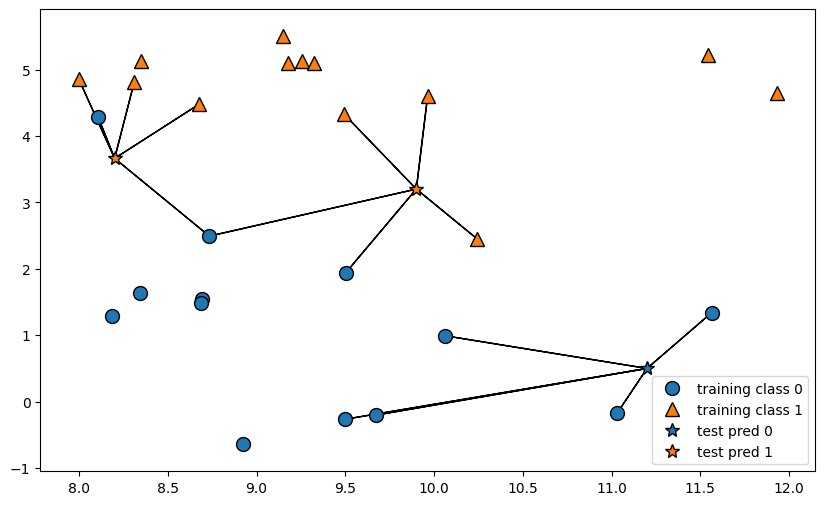

In [86]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [87]:
my_dict = {'Actual': y_test, 'Pred': y_pred, 'Proba_1': y_pred_proba[:,1], 'Proba_0': y_pred_proba[:,0]}

In [88]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
602,0,0,0.0,1.0
1642,0,0,0.0,1.0
2702,1,1,1.0,0.0
2398,1,1,1.0,0.0
309,0,0,0.0,1.0
2724,0,0,0.0,1.0
1469,1,1,1.0,0.0
1096,0,0,0.0,1.0
1049,0,0,0.0,1.0
1081,1,1,1.0,0.0


Model Performance on Classification Task

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [90]:
confusion_matrix(y_test, y_pred)

array([[278,  22],
       [ 16, 284]], dtype=int64)

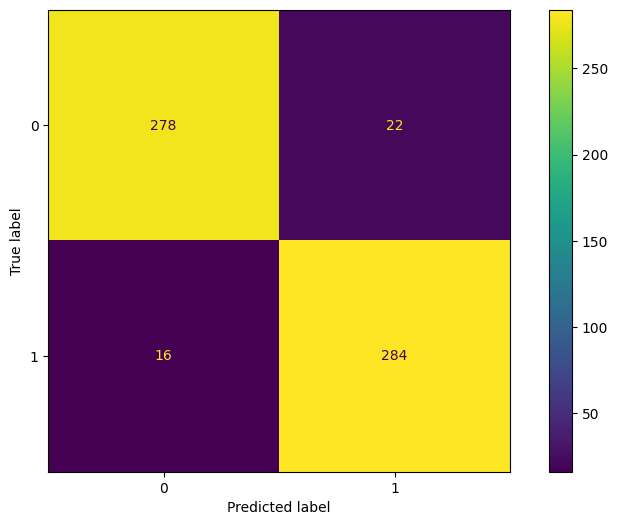

In [91]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test);

In [92]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[278  22]
 [ 16 284]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       300
           1       0.93      0.95      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



Elbow Method for Choosing Right K

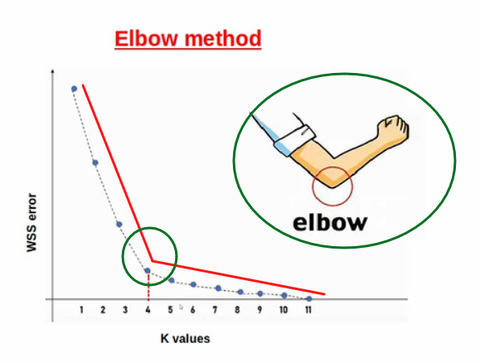

In [93]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [94]:
test_error_rates = []
train_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train)
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

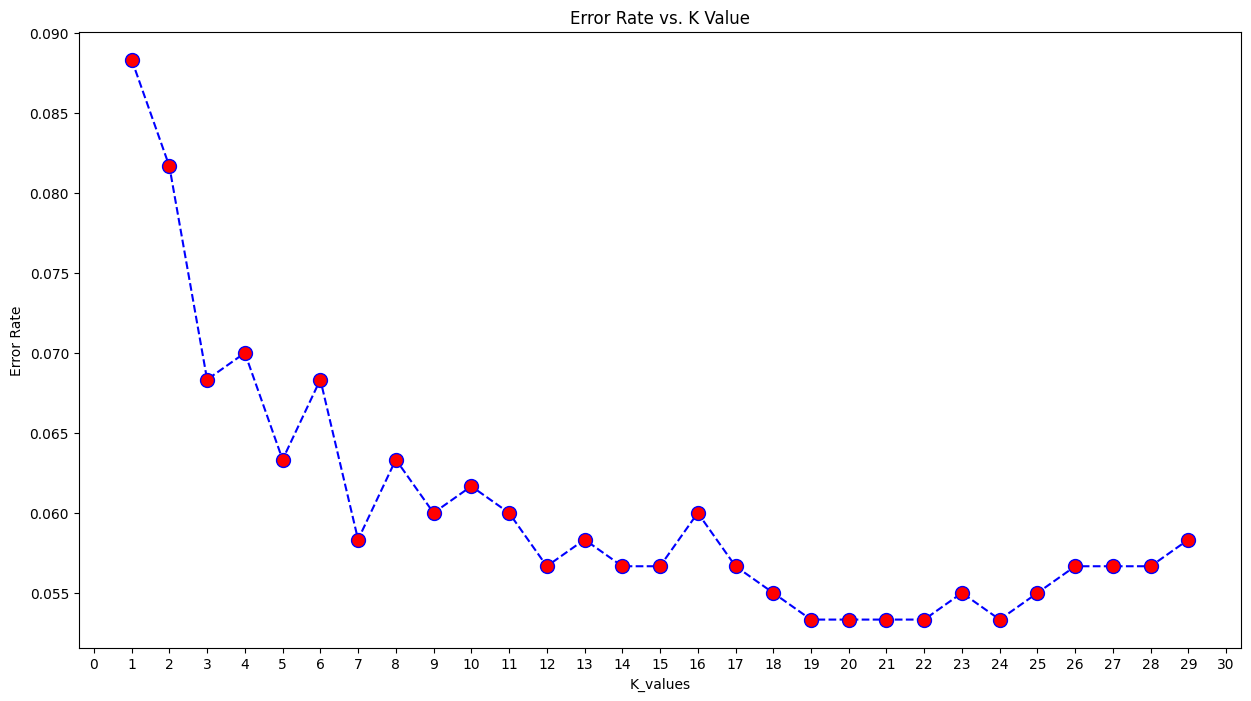

In [97]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.xticks(range(0, 31, 1));

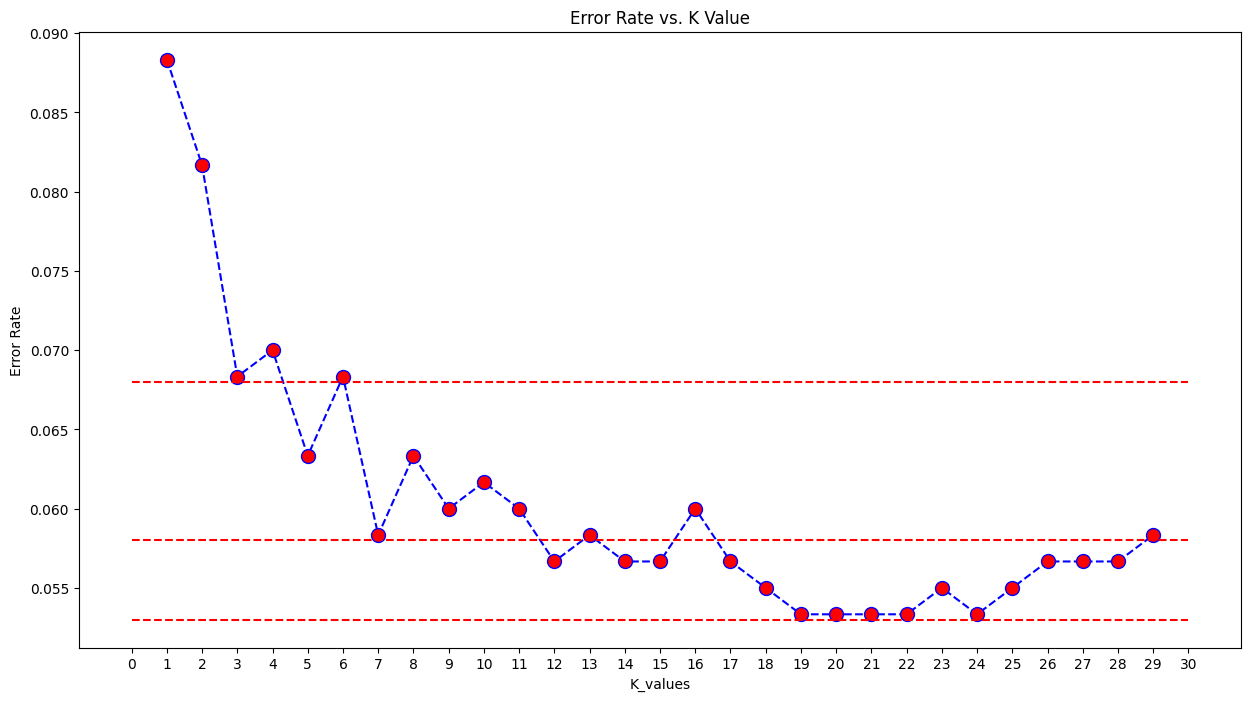

In [100]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.068, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.058, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.053, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.xticks(range(0, 31, 1));

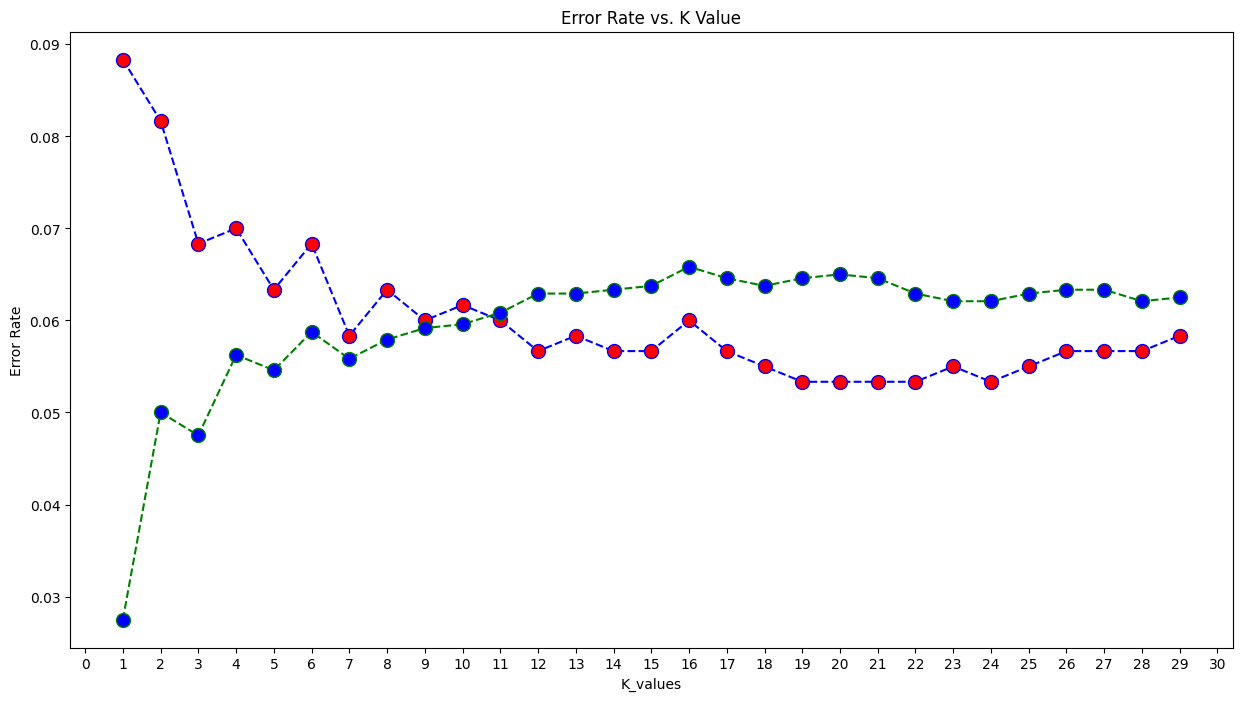

In [101]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(range(0, 31, 1));

Scores by Various K Values

In [102]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [104]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('With K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

With K=9

Test_Set

[[277  23]
 [ 13 287]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       300
           1       0.93      0.96      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600


Train_Set

[[1130   70]
 [  72 1128]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1200
           1       0.94      0.94      0.94      1200

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



In [105]:
k_list = [3, 6, 9, 16, 21, 22, 23]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled,y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set

[[277  23]
 [ 18 282]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       300
           1       0.92      0.94      0.93       300

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600


Train_Set

[[1143   57]
 [  57 1143]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1200
           1       0.95      0.95      0.95      1200

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400

WITH K=6

Test_Set

[[280  20]
 [ 21 279]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       300
           1       0.93      0.93      0.93       300

    accuracy                           0.93       600
   

Cross Validation for Optimal K Value

In [106]:
from sklearn.model_selection import cross_val_score, cross_validate

In [110]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv=10)

df_scores = pd.DataFrame(scores, index = range(1, 11))

In [111]:
df_scores.mean()[2:]

test_accuracy     0.927500
test_precision    0.926475
test_recall       0.929167
test_f1           0.927665
dtype: float64